## Introduction
This article describes how to test your algorithmic trading strategy on a portfolio of stocks. A portfolio reduces risk as opposed to just applying a strategy to a single stock. Optimizing the portfolio can result in higher returns and reduce overall risk (Increases Sharpe Ratio).

I highly recommend you do go through my previous articles to get a better grasp on this article.
- Backtesting a strategy in python
- BUY LOW SELL HIGH strategy back-testing in python
- Optimizing strategies in python

### Steps to be followed
1. Get the tools 
2. Create necessary functions to be applied to the portfolio
3. Apply the strategy on portfolio stocks and generate positions
4. Result and plots
5. Observations and Conclusions

#### Step 1. Get the tools 
Import the necessary libraries. 
Yfinance is used to download historical OHLCV data.

In [126]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from datetime import datetime as dt
import yfinance as yf
import nsepy
from statistics import mean

#### Step 2.  Create necessary functions to be applied to the portfolio
In this step, we create various functions that might have to be called on all the stocks.
This might help us encapsulate this functionality into a class later. (if and when needed)
The following functions are created
- Getting daily data
- Moving average strategy function
- Calculating cumulative returns
- Calculating annualized share

In [127]:
# get daily data from yfinance
def get_daily_data(symbol, start, end):
    data = yf.download(tickers=symbol, start=start, end=end)
    # data = nsepy.get_history(symbol=symbol, start=start, end=end)
    return data

# moving averages strategy on close price data
# [!] implement any strategy you like across all stocks in your portfolio
def ma(data,ma1,ma2):
    # Calcuulating daily returns
    data["bnh_returns"] = np.log(data["Close"]/data["Close"].shift())
    
    # calculating moving averages
    data['ma_short'] = data['Close'].ewm(span=ma1).mean()  
    data['ma_long'] = data['Close'].ewm(span=ma2).mean()

    # creating positions
    # data["position"] = [0]*len(data)
    data['position'] = np.where(data["ma_short"] > data["ma_long"], 1, 0)    
    data["strategy_returns"] = data["bnh_returns"] * data["position"]

    # returning data in a list
    returns = [data["strategy_returns"],data["bnh_returns"]]
    
    # pun intended
    return returns

# Cumulative returns fucntion
def get_cumulative_return(df):
    return list(df.cumsum())[-1]

#  Annualized sharpe ratio function
def get_annualized_sharpe_ratio(df):
    return 252**(1/2) * (df.mean() / df.std())

#### Step 3. Apply the strategy on portfolio stocks and generate positions
In this step, we define the portfolio and iterate over the stocks in it, squentially download the data and apply the moving averages strategy.

In [128]:
# backtesting parameters
days = 1000
end = dt.today()
start = end - pd.Timedelta(days=days)

# portfolio of stocks
portfolio_stocks = ["TSLA","AMZN","GOOG","AXP","MSFT"]

# defining a data frame to store portfolio returns
portfolio_strategy_returns = pd.DataFrame()
portfolio_bnh_returns = pd.DataFrame()

# iterating over stocks in the portfolio
for stock in portfolio_stocks:
    data = get_daily_data(stock, start, end)
    calculations = ma(data,ma1 = 3, ma2 = 10)
    portfolio_strategy_returns[stock] = calculations[0]
    portfolio_bnh_returns[stock] = calculations[1]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [129]:
print("\nBUY AND HOLD RETURNS ON PORTFOLIO")
portfolio_bnh_returns["Portfolio_rets"] = portfolio_bnh_returns.mean(axis=1)
print(portfolio_bnh_returns.round(decimals = 4).head(10))


BUY AND HOLD RETURNS ON PORTFOLIO
              TSLA    AMZN    GOOG     AXP    MSFT  Portfolio_rets
Date                                                              
2019-04-29     NaN     NaN     NaN     NaN     NaN             NaN
2019-04-30 -0.0116 -0.0062 -0.0801  0.0040  0.0064         -0.0175
2019-05-01 -0.0198 -0.0078 -0.0173 -0.0018 -0.0210         -0.0136
2019-05-02  0.0422 -0.0056 -0.0047  0.0020 -0.0131          0.0041
2019-05-03  0.0438  0.0319  0.0194  0.0178  0.0211          0.0268
2019-05-06  0.0012 -0.0061  0.0034 -0.0001 -0.0058         -0.0015
2019-05-07 -0.0330 -0.0153 -0.0129 -0.0094 -0.0207         -0.0183
2019-05-08 -0.0090 -0.0017 -0.0067 -0.0062 -0.0001         -0.0047
2019-05-09 -0.0117 -0.0094 -0.0033 -0.0020 -0.0001         -0.0053
2019-05-10 -0.0102 -0.0052  0.0016  0.0102  0.0129          0.0019


In [130]:
print("\nSTRATEGY RETURNS ON PORTFOLIO")
portfolio_strategy_returns["Portfolio_rets"] = portfolio_strategy_returns.mean(axis=1)
print(portfolio_strategy_returns.round(decimals = 4).head(10))


STRATEGY RETURNS ON PORTFOLIO
              TSLA    AMZN  GOOG     AXP    MSFT  Portfolio_rets
Date                                                            
2019-04-29     NaN     NaN   NaN     NaN     NaN             NaN
2019-04-30 -0.0000 -0.0000  -0.0  0.0040  0.0064          0.0021
2019-05-01 -0.0000 -0.0000  -0.0 -0.0018 -0.0000         -0.0004
2019-05-02  0.0422 -0.0000  -0.0  0.0020 -0.0000          0.0088
2019-05-03  0.0438  0.0319   0.0  0.0178  0.0000          0.0187
2019-05-06  0.0012 -0.0061   0.0 -0.0001 -0.0000         -0.0010
2019-05-07 -0.0330 -0.0153  -0.0 -0.0094 -0.0000         -0.0115
2019-05-08 -0.0090 -0.0000  -0.0 -0.0000 -0.0000         -0.0018
2019-05-09 -0.0000 -0.0000  -0.0 -0.0000 -0.0000          0.0000
2019-05-10 -0.0000 -0.0000   0.0  0.0102  0.0000          0.0020


#### Step 4. Result and plots
In this step, the portfolio on buy and hold strategy and the moving averages strategy is plotted. You can zoom in observe how the portfolio has varied over time by observing the portfolio_rets variable.

- It can be visually observed that the moving averages have outperformed the buy-and-hold strategy.
- The moving averages strategy has given a lot more returns and is observed to be less volatile.

In [131]:
print("Cumulative returns MA Stretegy           :",get_cumulative_return(portfolio_strategy_returns["Portfolio_rets"]))
print("Cumulative returns Buy and hold Stretegy :",get_cumulative_return(portfolio_bnh_returns["Portfolio_rets"]))
print("Annualized sharpe ratio MA Stretegy      :",get_annualized_sharpe_ratio(portfolio_strategy_returns["Portfolio_rets"]))
print("Annualized sharpe ratio MA Stretegy      :",get_annualized_sharpe_ratio(portfolio_bnh_returns["Portfolio_rets"]))


Cumulative returns MA Stretegy           : 2.4904858618130015
Cumulative returns Buy and hold Stretegy : 1.0735975367835984
Annualized sharpe ratio MA Stretegy      : 5.421419680779922
Annualized sharpe ratio MA Stretegy      : 1.2771384021977366


<AxesSubplot:title={'center':'BUY AND HOLD CUMULATIVE RETURNS'}, xlabel='Date'>

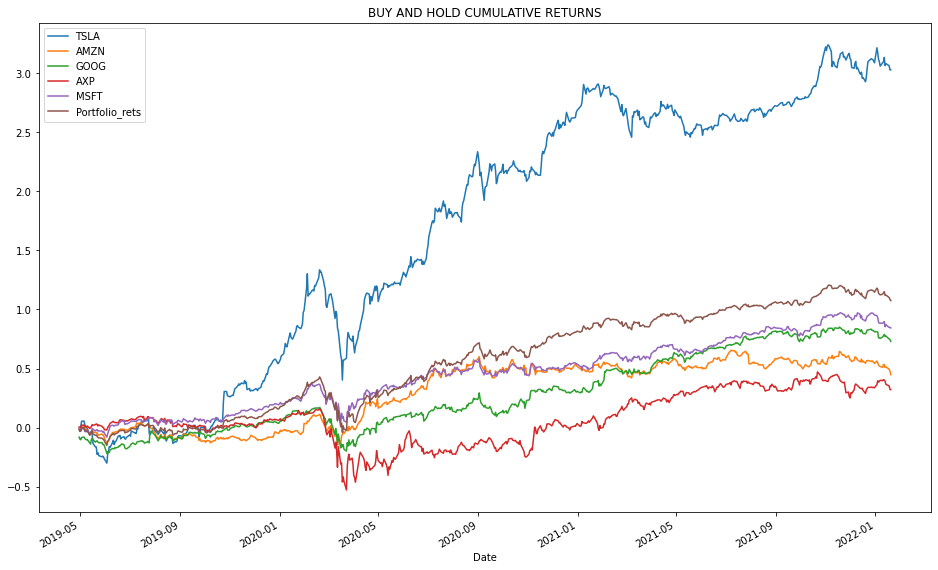

In [132]:
portfolio_bnh_returns.cumsum().plot(figsize=(16,10),title="BUY AND HOLD CUMULATIVE RETURNS")

<AxesSubplot:title={'center':'MOVING AVERAGES STRATEGY CUMULATIVE RETURNS'}, xlabel='Date'>

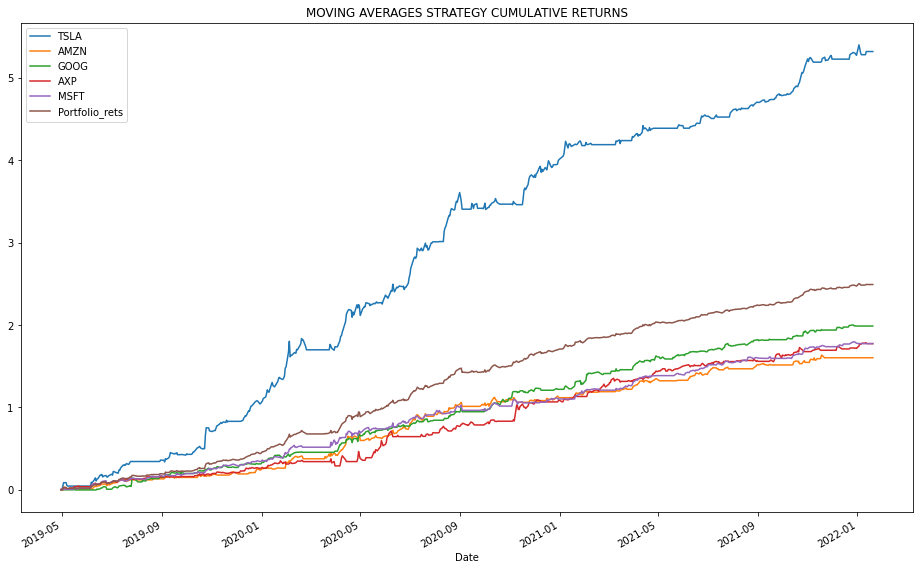

In [133]:
portfolio_strategy_returns.cumsum().plot(figsize=(16,10), title="MOVING AVERAGES STRATEGY CUMULATIVE RETURNS")

<AxesSubplot:title={'center':'COMPARING CUMULATIVE RETURNS ON BOTH STRATEGIES'}, xlabel='Date'>

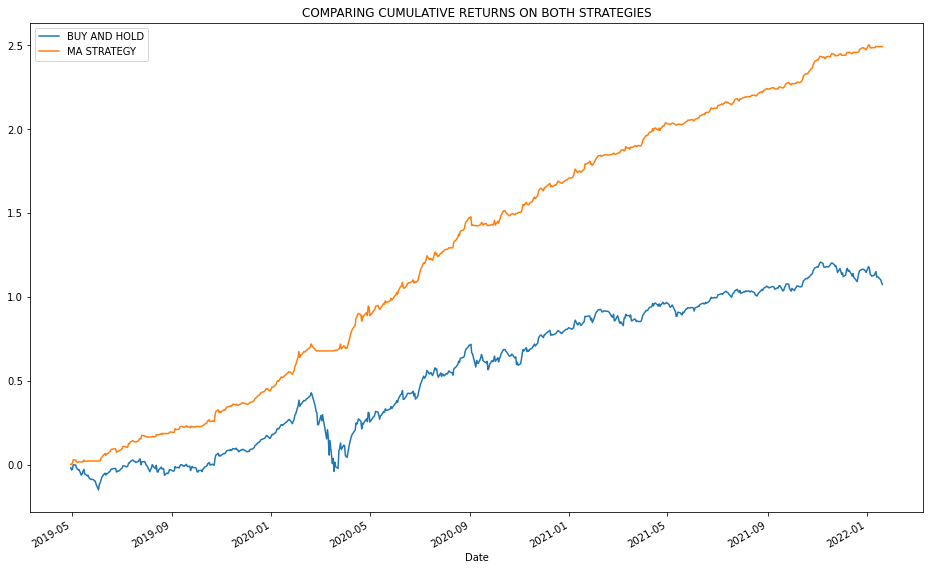

In [134]:
returns = pd.DataFrame()
returns["BUY AND HOLD"] = portfolio_bnh_returns["Portfolio_rets"]
returns["MA STRATEGY"] = portfolio_strategy_returns["Portfolio_rets"]
returns.cumsum().plot(figsize=(16,10), title="COMPARING CUMULATIVE RETURNS ON BOTH STRATEGIES")

#### 5. Observations and Conclusions

In conclusion
- The moving averages strategy has a high Sharpe ratio.
- Please bear in mind that the strategy is not validated in terms of transaction costs.
- The moving strategy can be individually optimized on the stocks in the portfolio.
- This strategy has been only been backtested for the last 1000 days, and the market after the pandemic was mostly bullish which could be working with the long-only moving averages strategy. Future market conditions may not produce the exact results.